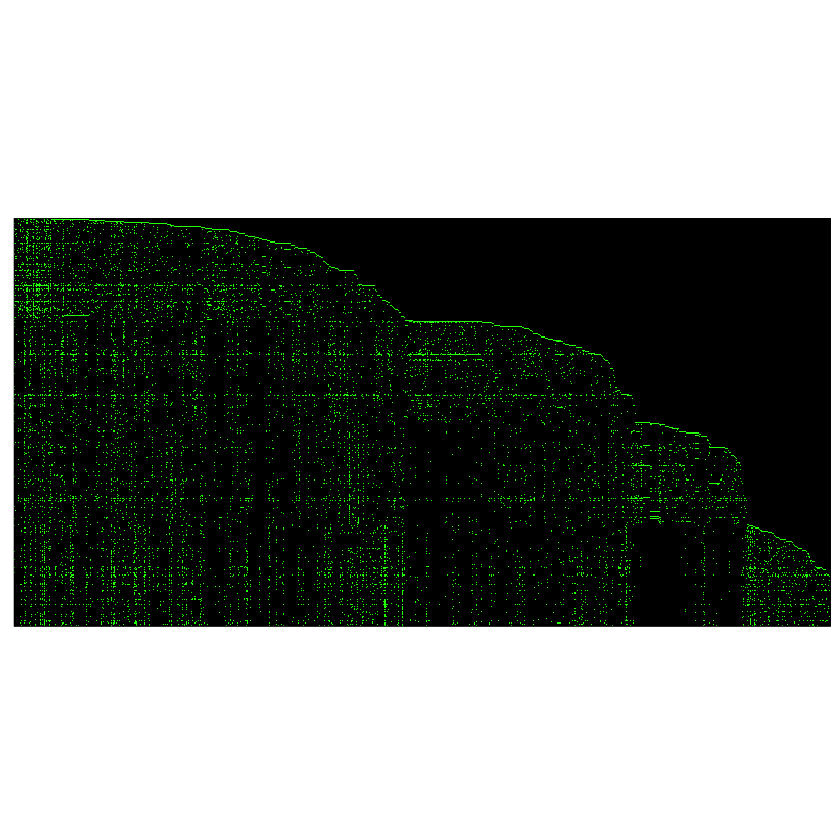

In [64]:
source("util.R")

# load the document-term matrix
Ptilde <- as.matrix( read.csv("data/news.csv") )
P <- Ptilde/sum(Ptilde) ## replace word frequencies by "probabilities"

# the data is sorted by newsgroup; this is not exploited/known to NMF
# throghout the notebook I truncate values >0.00001 for improved visiblity
# I also decided not to plot the legend
ggplotm(pmin(P,0.000001), format="", show.axis=FALSE, mid="black",show.legend=FALSE)

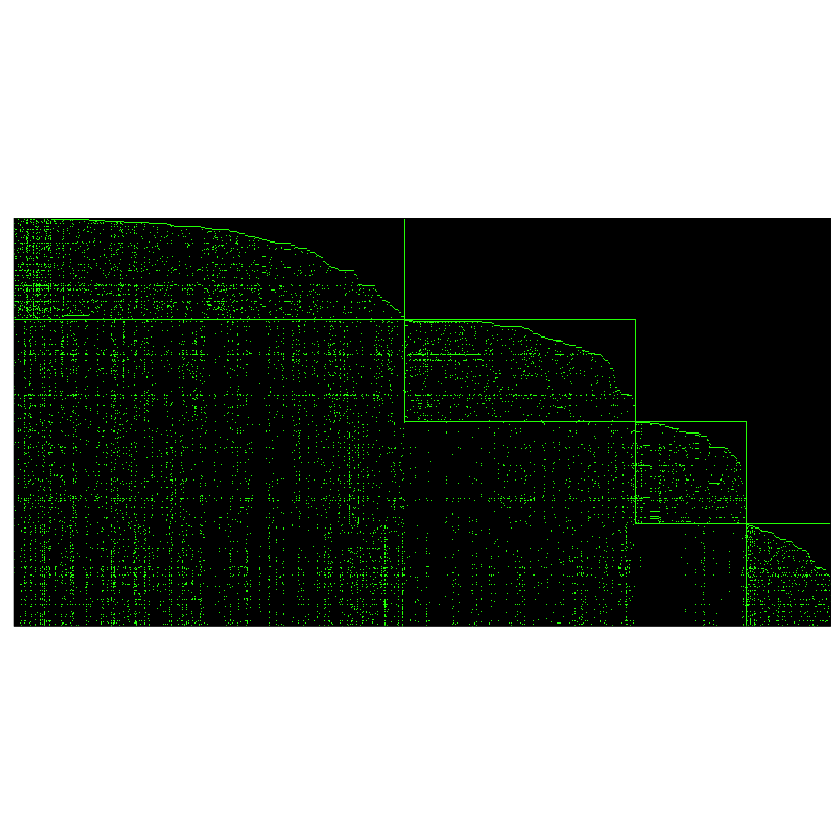

In [65]:
# values for box boundaries are are derived in understandin_sorting_order.ipynb
P[1:200+1,383]<-1
P[100:300,609]<-1
P[200:400,718]<-1
P[100,1:609]<-1
P[200, 383:718]<-1
P[300, 609:800]<-1
ggplotm(pmin(P,0.000001), format="", show.axis=FALSE, mid="black",show.legend=FALSE)

# 1 Topic modelling with NMF

**We will first apply NMF to the normalized newsgroup data to discover latent topics. Start by computing the NMF optimizing the KL divergence for r = 4 factors. The output of this step will be two unnormalized matrices W and H.**


In [53]:
############
## 1. NMF ##
############

## load the document-term matrix
Ptilde <- as.matrix( read.csv("data/news.csv") )
P <- Ptilde/sum(Ptilde) ## replace word frequencies by "probabilities"

## run NMF using GKL
r <- 4
lr.gkl <- lee01.gkl(P, r, reps=5)

## also compute SVD
P.svd <- svd(P)
rownames(P.svd$v) <- colnames(P)


Epoch 0 , loss 321278.5 
Epoch 1 , 2.565347 
Epoch 2 , 2.519829 
Epoch 3 , 2.458749 
Epoch 4 , 2.378566 
Epoch 5 , 2.288209 
Epoch 6 , 2.205737 
Epoch 7 , 2.141006 
Epoch 8 , 2.092583 
Epoch 9 , 2.058139 
Epoch 10 , 2.035141 
Epoch 11 , 2.019245 
Epoch 12 , 2.006901 
Epoch 13 , 1.997032 
Epoch 14 , 1.99011 
Epoch 15 , 1.985254 
Epoch 16 , 1.981196 
Epoch 17 , 1.977201 
Epoch 18 , 1.97268 
Epoch 19 , 1.968617 
Epoch 20 , 1.964854 
Epoch 21 , 1.960992 
Epoch 22 , 1.956876 
Epoch 23 , 1.952414 
Epoch 24 , 1.947581 
Epoch 25 , 1.942304 
Epoch 26 , 1.936502 
Epoch 27 , 1.930598 
Epoch 28 , 1.925484 
Epoch 29 , 1.921304 
Epoch 30 , 1.917665 
Epoch 31 , 1.913652 
Epoch 32 , 1.907781 
Epoch 33 , 1.900077 
Epoch 34 , 1.89318 
Epoch 35 , 1.888026 
Epoch 36 , 1.883488 
Epoch 37 , 1.878672 
Epoch 38 , 1.87313 
Epoch 39 , 1.866917 
Epoch 40 , 1.86055 
Epoch 41 , 1.855084 
Epoch 42 , 1.85083 
Epoch 43 , 1.847004 
Epoch 44 , 1.843659 
Epoch 45 , 1.841077 
Epoch 46 , 1.839389 
Epoch 47 , 1.838353 
Epo

## 1a) Study the top-10 terms in the right-hand factor matrix H 


In [54]:
## print results - NMF
# non-deterministic: row order may change
# also top-10 values may change 
with(lr.gkl,
     for (k in 1:nrow(R)) {
         print(rev(sort(R[k,]))[1:10])
         cat(strrep('-',80), "\n")
     })



       space       launch        orbit      mission         nasa       shuttl 
4.858214e-05 2.947696e-05 2.393416e-05 2.367466e-05 2.102419e-05 2.091082e-05 
        venu       system         year        earth 
1.864373e-05 1.518675e-05 1.501955e-05 1.449573e-05 
-------------------------------------------------------------------------------- 
         kei      encrypt       system        secur       govern         chip 
5.613425e-05 4.517876e-05 2.806678e-05 2.720682e-05 2.650330e-05 2.492460e-05 
     clipper        peopl          law       public 
2.170224e-05 2.131196e-05 1.984080e-05 1.578073e-05 
-------------------------------------------------------------------------------- 
       studi       diseas       doctor       effect        medic      candida 
1.832757e-05 1.822350e-05 1.777878e-05 1.766037e-05 1.755659e-05 1.644587e-05 
     patient        peopl         drug         food 
1.577887e-05 1.564467e-05 1.428315e-05 1.333373e-05 
--------------------------------------------

In [41]:
# 1c) compare top-10 terms of SVD and NMF
# SVD is deterministic: we will always obtain the same row/topic order and the same terms
# SVD s hard to interpret: describing objects by absence of attributes is counterintuitive for humans
# by looking at high values > 0 we can (arguably) derive row 3 = crypt (but note that 'encrypt' also among top-10 if row 4); row 2 = med

with(P.svd,
     for (k in 1:r) {
         y=order(abs(v[,k]))
         print(rev(v[y,k])[1:10])
         cat(strrep('-',80), "\n")
     })

      venu      space     soviet      probe     system    mission       year 
-0.3467093 -0.2408041 -0.2279326 -0.2041376 -0.1901447 -0.1813604 -0.1564498 
     studi    program      earth 
-0.1438261 -0.1335832 -0.1298500 
-------------------------------------------------------------------------------- 
      venu     soviet      probe      space     cancer    mission       drug 
-0.3843787 -0.2514368 -0.2209769 -0.2148817  0.1793495 -0.1781779  0.1768813 
    diseas       diet      peopl 
 0.1715696  0.1685100  0.1492283 
-------------------------------------------------------------------------------- 
   encrypt        kei        law     cancer       diet     diseas      secur 
 0.3817868  0.2849342  0.2344941 -0.2042601 -0.1884720 -0.1883962  0.1843405 
     devic       chip     health 
 0.1754694  0.1627822 -0.1616573 
-------------------------------------------------------------------------------- 
       god   homosexu  christian    encrypt       paul        sin      peopl 
-0.5

## 1b) Study the reconstructed matrix. 

**Does it look like you would have expected? Which aspects are covered well? Which are not?**

If we visually study the reconstructed matrix, we observe the following:
Since the ent
 


Epoch 0 , loss 312989.9 
Epoch 1 , 2.565127 
Epoch 2 , 2.522072 
Epoch 3 , 2.467373 
Epoch 4 , 2.395957 
Epoch 5 , 2.312414 
Epoch 6 , 2.226537 
Epoch 7 , 2.147066 
Epoch 8 , 2.080278 
Epoch 9 , 2.029875 
Epoch 10 , 1.992707 
Epoch 11 , 1.962574 
Epoch 12 , 1.937042 
Epoch 13 , 1.914583 
Epoch 14 , 1.895324 
Epoch 15 , 1.879395 
Epoch 16 , 1.866898 
Epoch 17 , 1.858631 
Epoch 18 , 1.852571 
Epoch 19 , 1.847729 
Epoch 20 , 1.844498 
Epoch 21 , 1.841151 
Epoch 22 , 1.839162 
Epoch 23 , 1.837783 
Epoch 24 , 1.83633 
Epoch 25 , 1.834532 
Epoch 26 , 1.832523 
Epoch 27 , 1.83072 
Epoch 28 , 1.828962 
Epoch 29 , 1.82756 
Epoch 30 , 1.82652 
Epoch 31 , 1.825944 
Epoch 32 , 1.825612 
Epoch 33 , 1.82533 
Epoch 34 , 1.824986 
Epoch 35 , 1.824597 
Epoch 36 , 1.824325 
Epoch 37 , 1.824128 
Epoch 38 , 1.823875 
Epoch 39 , 1.823469 
Epoch 40 , 1.822989 
Epoch 41 , 1.822496 
Epoch 42 , 1.821976 
Epoch 43 , 1.821676 
Epoch 44 , 1.821543 
Epoch 0 , loss 313917.2 
Epoch 1 , 2.555329 
Epoch 2 , 2.498556 


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 0.000e+00 2.491e-07 3.124e-06 1.871e-06 1.469e-03 

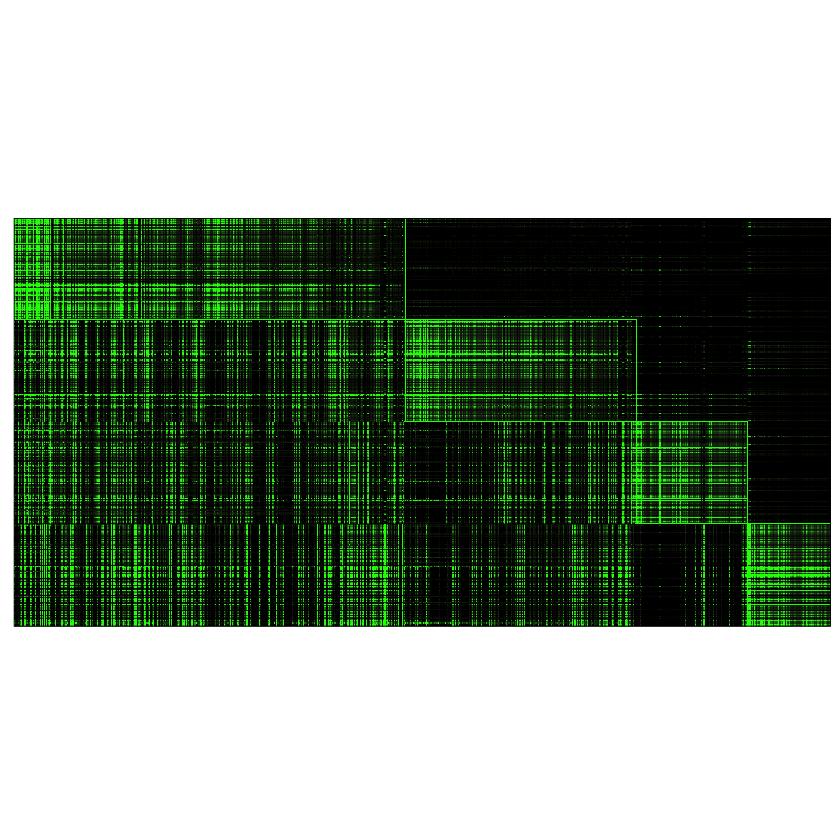

In [66]:
## look at the reconstruction -  NMF

## load the document-term matrix
Ptilde <- as.matrix( read.csv("data/news.csv") )
P <- Ptilde/sum(Ptilde) ## replace word frequencies by "probabilities"

## run NMF using GKL
r <- 4
lr.gkl <- lee01.gkl(P, r, reps=5)


Phat <- lr.gkl$L %*% lr.gkl$R
summary(as.vector(Phat))

# important to do this after the decomposition
Phat[0:200,383+1]<-1
Phat[100:300,609+1]<-1
Phat[200:400,718+1]<-1
Phat[100,1:609]<-1
Phat[200, 383:718]<-1
Phat[300, 609:800]<-1

ggplotm(pmin(Phat, 0.00001), format="", show.axis=FALSE, mid="black", show.legend=FALSE)


In [ ]:
## look at the decomposition (here: Rtilde and V)
## NMF - Rtilde 
#ggplotm(lr.gkl$R, format="", show.axis=FALSE, mid="black") # enlarge plot or subselect columns to see something
ggplotm(lr.gkl$R[,40:60], format="", rotate.labels=TRUE, mid="black") # first 30 columns

In [ ]:
# find out ground truth groups by manually looping through the data;
# alternative: reverse-engineering of sorting logic (see helper.ipynb that contains corresponding python file)
# first block: cipher : 250
# second block: medicin,  e.g. labels 250:450
# second last block: space, e.g. labels 600:650
# last block: religion, e.g. labels: 750:800
ggplotm(t(P.svd$v[250:300,1:4]), format="", rotate.labels=TRUE, mid="black") # first 30 columns


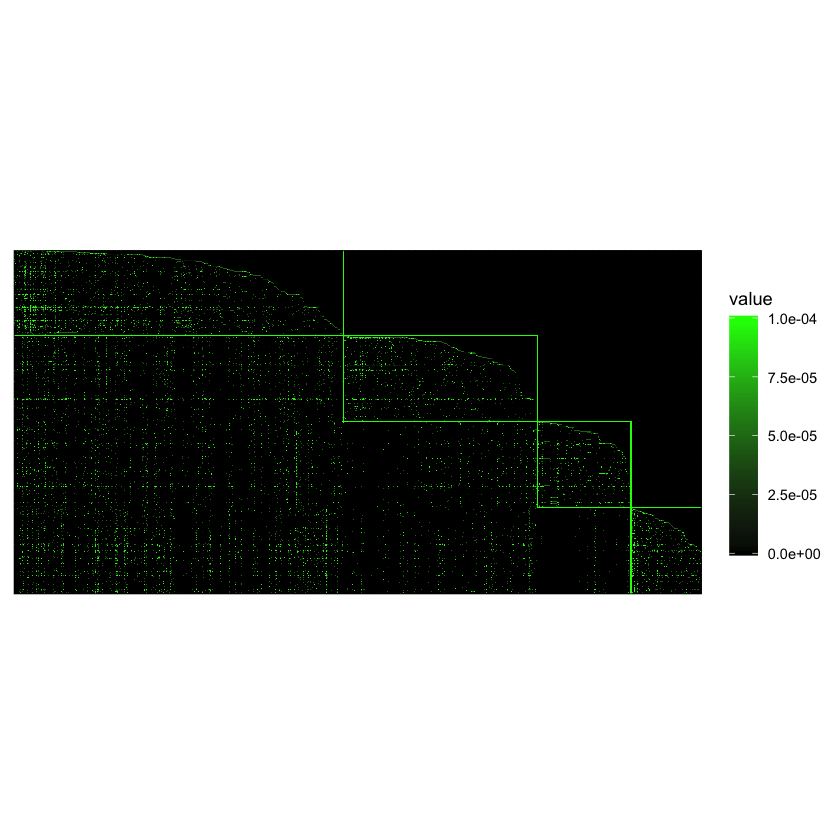

In [22]:
## recall the original data matrix
## the data is sorted by newsgroup; this is not exploited/known to NMF
## here we truncate values >0.000001 for improved visiblity
P[0:200,383+1]<-1
P[100:300,609+1]<-1
P[200:400,718+1]<-1
P[100,1:609]<-1
P[200, 383:718]<-1
P[300, 609:800]<-1
ggplotm(pmin(P,0.0001), format="", show.axis=FALSE, mid="black")


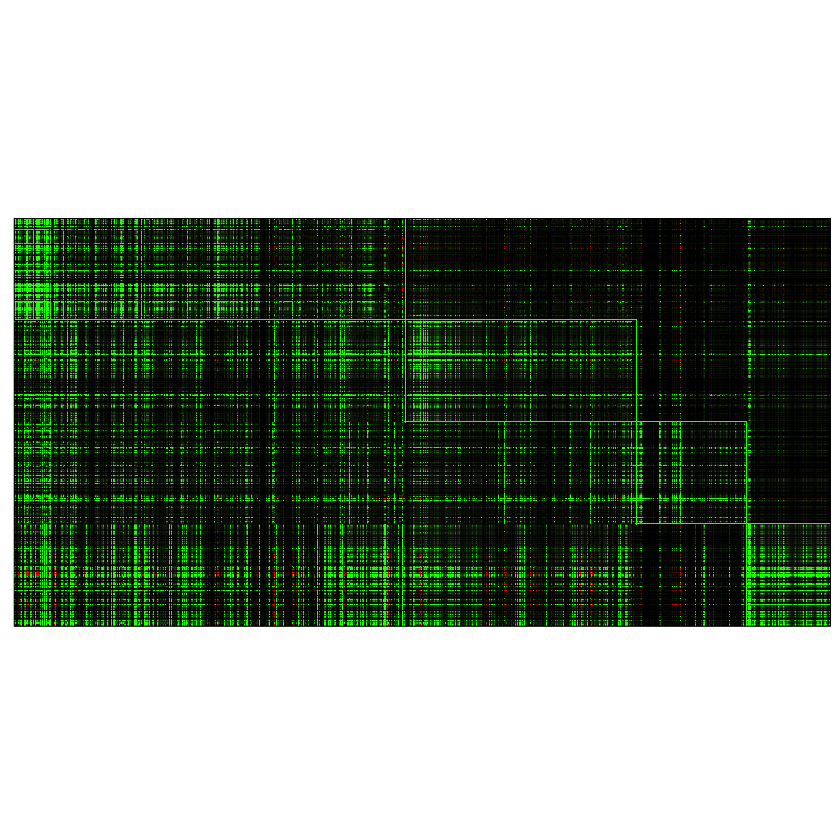

In [70]:
# look at the reconstruction - SVD
# observe that e.g. for topic 2 we reconstruct negative values, which is clearly a mistake
# one should never observe negative values
Phat <- P.svd$u[,1:4] %*% diag(P.svd$d[1:4]) %*% t(P.svd$v[,1:4])
Phat[0:200+1,383+1]<-1
Phat[100:300+1,609+1]<-1
Phat[200:400,718]<-1
Phat[100,1:609+1]<-1
Phat[200, 383:718]<-1
Phat[300, 609:800]<-1
#summary(as.vector(Phat))
ggplotm(pmax(pmin(Phat,0.00001),-0.00001), format="", show.axis=FALSE, mid="black", show.legend=FALSE)

## 1c) Take the rank-4 truncated SVD of the data and study the decompositon along the lines mentioned above. Compare!

You can find the code cells above to allow for a better comparison.

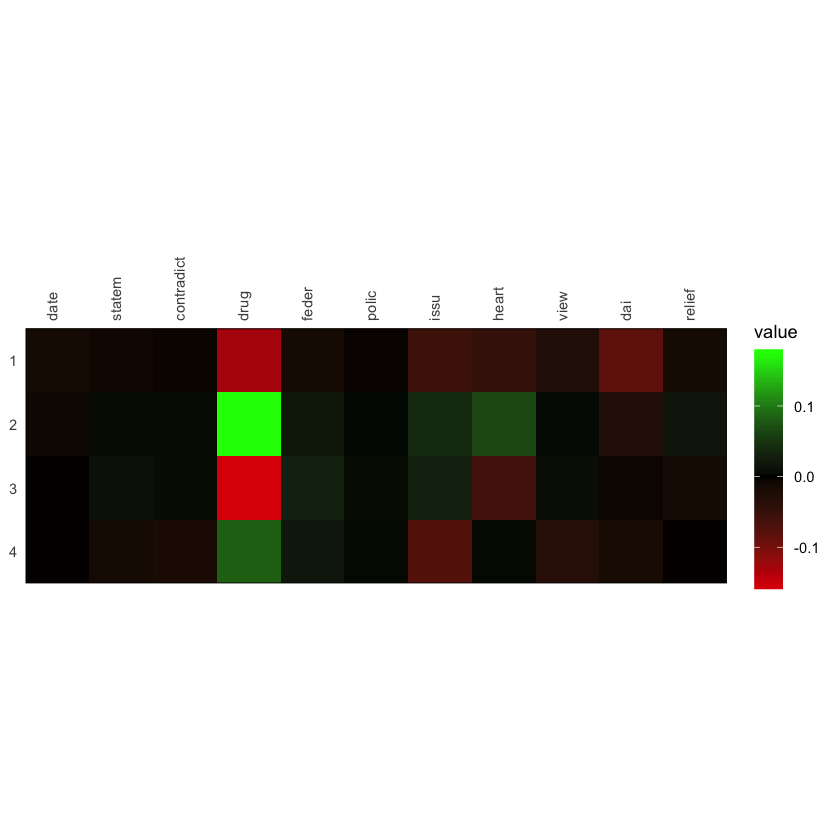

In [74]:
# SVD - V
# have a look at the column representing drug, good illustration
#ggplotm(t(P.svd$v[,1:4]), format="", show.axis=FALSE, mid="black")
ggplotm(t(P.svd$v[50:60,1:4]), format="", rotate.labels=TRUE, mid="black") # first 30 columns

## 1d) Rank-2 NMF

In [96]:
## run NMF using GKL with rank = 2
r <- 2
lr.gkl.r2 <- lee01.gkl(P, r, reps=5)

Epoch 0 , loss 154959 
Epoch 1 , 2.587887 
Epoch 2 , 2.568137 
Epoch 3 , 2.549743 
Epoch 4 , 2.527996 
Epoch 5 , 2.50022 
Epoch 6 , 2.465212 
Epoch 7 , 2.423679 
Epoch 8 , 2.379224 
Epoch 9 , 2.33829 
Epoch 10 , 2.305431 
Epoch 11 , 2.280838 
Epoch 12 , 2.26467 
Epoch 13 , 2.255255 
Epoch 14 , 2.249149 
Epoch 15 , 2.245005 
Epoch 16 , 2.242348 
Epoch 17 , 2.240688 
Epoch 18 , 2.239613 
Epoch 19 , 2.238765 
Epoch 20 , 2.238066 
Epoch 21 , 2.237576 
Epoch 22 , 2.237239 
Epoch 23 , 2.236961 
Epoch 24 , 2.236683 
Epoch 25 , 2.236444 
Epoch 26 , 2.236249 
Epoch 0 , loss 159000.1 
Epoch 1 , 2.58884 
Epoch 2 , 2.563532 
Epoch 3 , 2.53722 
Epoch 4 , 2.504609 
Epoch 5 , 2.463634 
Epoch 6 , 2.416158 
Epoch 7 , 2.368267 
Epoch 8 , 2.327464 
Epoch 9 , 2.296373 
Epoch 10 , 2.275396 
Epoch 11 , 2.2612 
Epoch 12 , 2.251473 
Epoch 13 , 2.245879 
Epoch 14 , 2.242913 
Epoch 15 , 2.240863 
Epoch 16 , 2.239301 
Epoch 17 , 2.238216 
Epoch 18 , 2.23745 
Epoch 19 , 2.236857 
Epoch 20 , 2.236378 
Epoch 21 , 2

## 1e ) Now try different values of k (at least r = 2 and r = 8) and repeat the analysis (for NMF only).
How do the results change? Can you name a single best rank?


Compared to the rank-4 approximation from Figure 2 the rank-8 approximation makes only minor improvements. It is
hard to identify obvious differences between the two matrices when compared side-by-side.
In general, we see that the rank-2 NMF produces unreliable results that do not provide much value, because some topics are connected, although they are from different categories. The rank-8 NMF improves the factorization slightly and can produce useful results if someone wants to split the existing topics even further. In our opinion, the rank-8 results are to fine-granular. Thus, we conclude that the rank-4 NMF produces the best results and recommend to use a rank that is similar to the number of topics, if known beforehand.


In [97]:
## print results
with(lr.gkl.r2,
     for (k in 1:nrow(R)) {
         print(rev(sort(R[k,]))[1:10])
         cat(strrep('-',80), "\n")
     })

         god        peopl          kei    christian      encrypt       church 
6.539086e-05 5.280235e-05 5.095598e-05 4.453094e-05 4.242158e-05 3.515597e-05 
         law        secur         chip         paul 
3.107505e-05 2.554647e-05 2.506701e-05 2.460758e-05 
-------------------------------------------------------------------------------- 
       space       system         year       launch       effect      mission 
4.438872e-05 3.029017e-05 2.725325e-05 2.649735e-05 2.157649e-05 2.151498e-05 
       orbit        studi         nasa       shuttl 
2.151470e-05 2.118090e-05 2.015504e-05 1.879691e-05 
-------------------------------------------------------------------------------- 


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 1.046e-07 6.956e-07 3.124e-06 2.371e-06 6.787e-04 

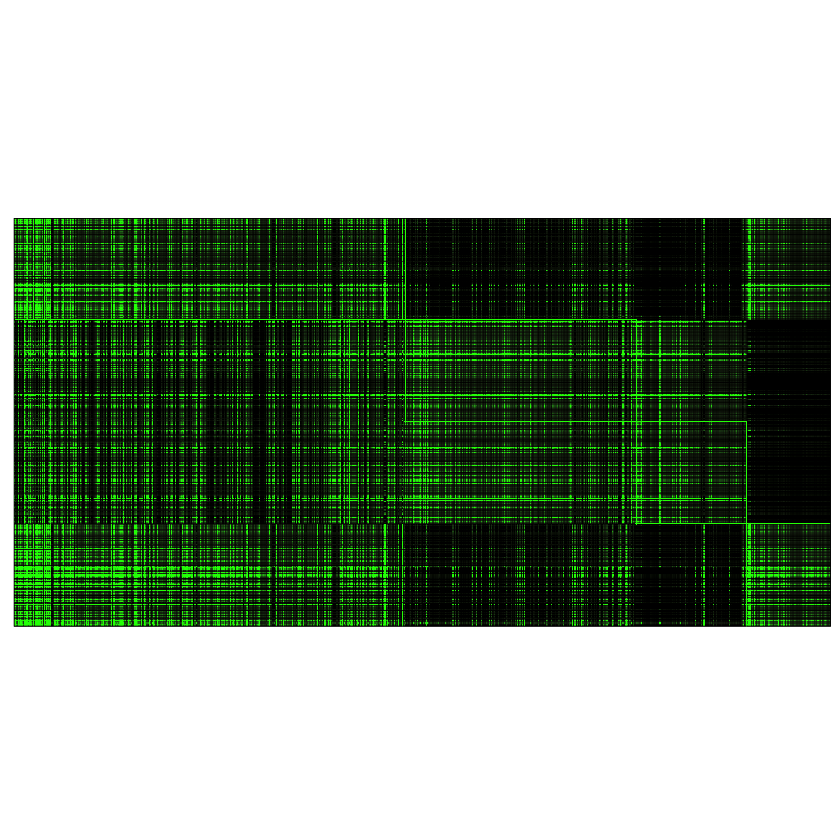

In [87]:
## look at the reconstruction
Phat <- lr.gkl.r2$L %*% lr.gkl.r2$R
Phat[0:200+1,383+1]<- 1
Phat[100:300+1,609+1]<-  1
Phat[200:400,718]<- 1
Phat[100,1:609+1]<- 1
Phat[200, 383:718]<- 1
Phat[300, 609:800]<- 1
#summary(as.vector(Phat.r2))
ggplotm(pmin(Phat, 0.00001), format="", show.axis=FALSE, mid="black", show.legend=FALSE)

## 1d) Rank-8 NMF


In [88]:
## run NMF using GKL with rank = 8
r <- 8
lr.gkl.r8 <- lee01.gkl(P, r, reps=5)

Epoch 0 , loss 636234.9 
Epoch 1 , 2.544561 
Epoch 2 , 2.475845 
Epoch 3 , 2.374984 
Epoch 4 , 2.250395 
Epoch 5 , 2.125791 
Epoch 6 , 2.01934 
Epoch 7 , 1.934397 
Epoch 8 , 1.866965 
Epoch 9 , 1.814605 
Epoch 10 , 1.776468 
Epoch 11 , 1.74894 
Epoch 12 , 1.729026 
Epoch 13 , 1.715549 
Epoch 14 , 1.706071 
Epoch 15 , 1.698934 
Epoch 16 , 1.693136 
Epoch 17 , 1.688847 
Epoch 18 , 1.685586 
Epoch 19 , 1.682772 
Epoch 20 , 1.680446 
Epoch 21 , 1.678502 
Epoch 22 , 1.676542 
Epoch 23 , 1.674471 
Epoch 24 , 1.672675 
Epoch 25 , 1.671127 
Epoch 26 , 1.669772 
Epoch 27 , 1.668514 
Epoch 28 , 1.667307 
Epoch 29 , 1.666184 
Epoch 30 , 1.665164 
Epoch 31 , 1.664194 
Epoch 32 , 1.663239 
Epoch 33 , 1.662286 
Epoch 34 , 1.661377 
Epoch 35 , 1.660584 
Epoch 36 , 1.659904 
Epoch 37 , 1.65928 
Epoch 38 , 1.658657 
Epoch 39 , 1.658147 
Epoch 40 , 1.657779 
Epoch 41 , 1.657458 
Epoch 42 , 1.657144 
Epoch 43 , 1.656823 
Epoch 44 , 1.656494 
Epoch 45 , 1.656167 
Epoch 46 , 1.655859 
Epoch 47 , 1.655566 


In [89]:
## print results
with(lr.gkl.r8,
     for (k in 1:nrow(R)) {
         print(rev(sort(R[k,]))[1:10])
         cat(strrep('-',80), "\n")
     })

         god    christian         jesu          sin        peopl         paul 
5.367741e-05 2.164334e-05 2.071679e-05 1.678829e-05 1.179529e-05 1.177452e-05 
       faith          law         book         word 
1.051842e-05 1.033059e-05 8.652422e-06 7.780044e-06 
-------------------------------------------------------------------------------- 
       truth    christian     question         true          god        peopl 
1.817961e-05 1.573255e-05 1.498795e-05 1.278950e-05 1.258176e-05 1.177714e-05 
     languag        faith     religion       belief 
1.133853e-05 1.115863e-05 1.033581e-05 9.211086e-06 
-------------------------------------------------------------------------------- 
        drug       diseas       cancer     research        studi       effect 
1.284464e-05 1.282406e-05 1.178152e-05 1.094034e-05 1.050270e-05 1.026423e-05 
        diet       system       health       scienc 
1.022932e-05 1.018307e-05 9.971989e-06 9.511647e-06 
--------------------------------------------

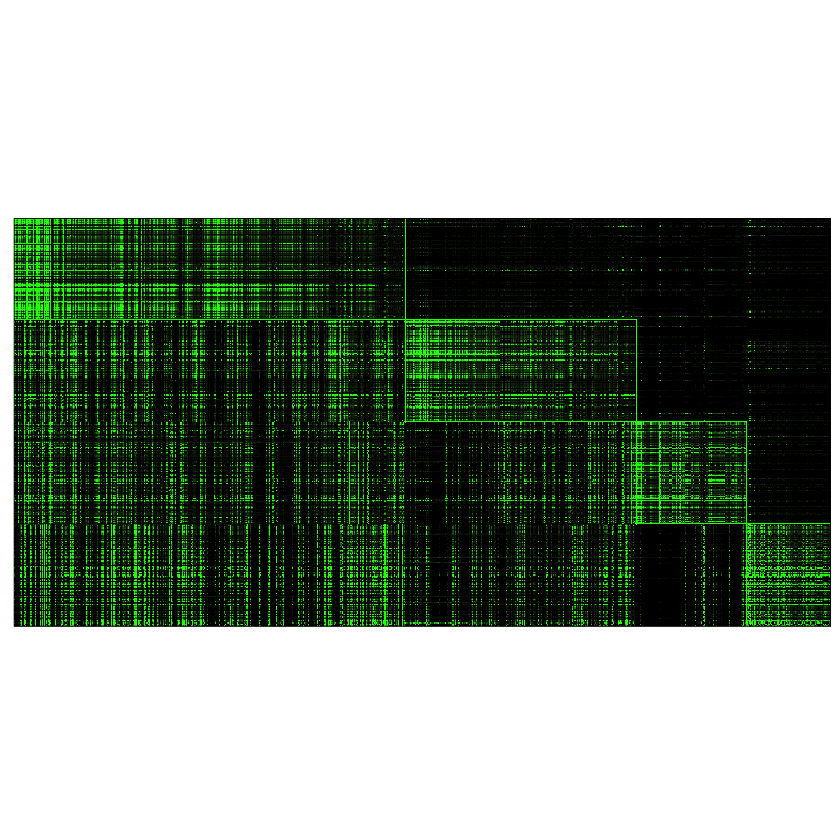

In [111]:
# look at the reconstruction
Phat <- lr.gkl.r8$L %*% lr.gkl.r8$R
Phat[0:200+1,383+1]<- 1
Phat[100:300+1,609+1]<-  1
Phat[200:400,718]<- 1
Phat[100,1:609+1]<- 1
Phat[200, 383:718]<- 1
Phat[300, 609:800]<- 1
#summary(as.vector(Phat.r8))
ggplotm(pmin(Phat, 0.00001), format="", show.axis=FALSE, mid="black", show.legend = FALSE)

## 1e) Apply Gaussian NMF (i.e., using Euclidean norm). 


In [98]:
## Gaussian NMF
# Note: if we run this code cell several times, we may obtain different factorizations
# n
r <- 4
lr.gnmf <- lee01.gnmf(P, r, reps=5)

## YOUR CODE HERE
## print results
with(lr.gnmf,
     for (k in 1:nrow(R)) {
         print(rev(sort(R[k,]))[1:10])
         cat(strrep('-',80), "\n")
     })

Epoch 0 , loss 623.7133 
Epoch 1 , 0.01430458 
Epoch 2 , 0.01372294 
Epoch 3 , 0.01306052 
Epoch 4 , 0.01254959 
Epoch 5 , 0.01224825 
Epoch 6 , 0.01210435 
Epoch 7 , 0.01202467 
Epoch 8 , 0.01197482 
Epoch 9 , 0.0119359 
Epoch 10 , 0.01189389 
Epoch 11 , 0.01183905 
Epoch 12 , 0.01177297 
Epoch 13 , 0.01170972 
Epoch 14 , 0.01165765 
Epoch 15 , 0.01161435 
Epoch 16 , 0.01158397 
Epoch 17 , 0.01156893 
Epoch 18 , 0.01156296 
Epoch 19 , 0.01156015 
Epoch 20 , 0.01155867 
Epoch 21 , 0.01155769 
Epoch 0 , loss 612.214 
Epoch 1 , 0.01424811 
Epoch 2 , 0.01350543 
Epoch 3 , 0.0129318 
Epoch 4 , 0.0125463 
Epoch 5 , 0.01224557 
Epoch 6 , 0.01204648 
Epoch 7 , 0.01196878 
Epoch 8 , 0.01194109 
Epoch 9 , 0.0119281 
Epoch 10 , 0.0119203 
Epoch 11 , 0.01191483 
Epoch 12 , 0.01191086 
Epoch 13 , 0.01190806 
Epoch 14 , 0.01190613 
Epoch 15 , 0.0119048 
Epoch 16 , 0.01190388 
Epoch 0 , loss 628.605 
Epoch 1 , 0.01435174 
Epoch 2 , 0.01388094 
Epoch 3 , 0.01344165 
Epoch 4 , 0.01311814 
Epoch 5 , 0.

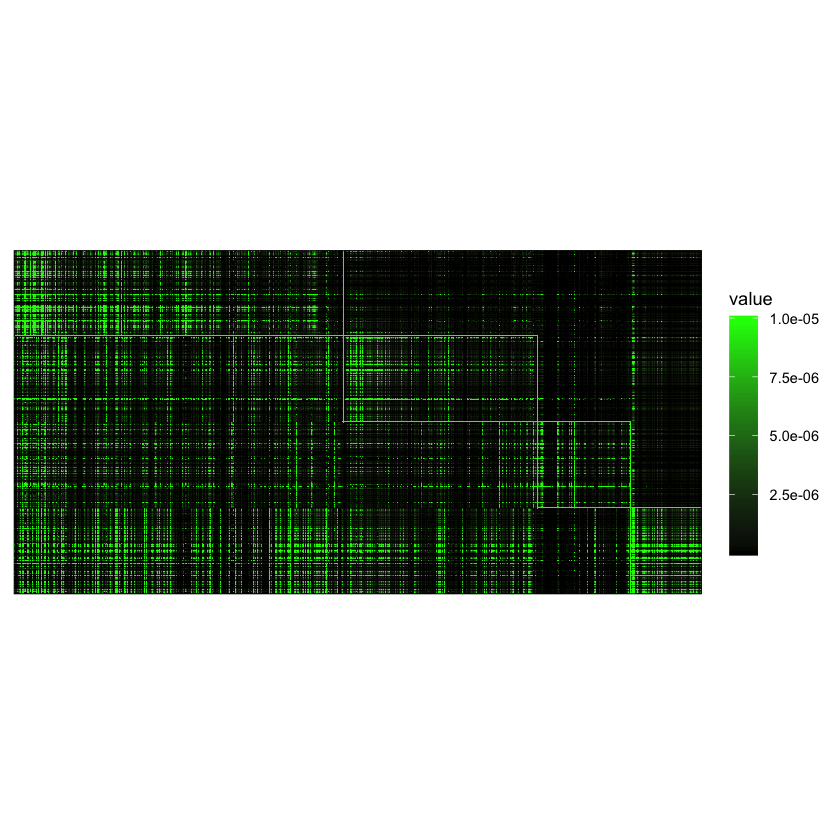

In [112]:
## look at the reconstruction
Phat <- lr.gnmf$L %*% lr.gnmf$R
Phat[0:200+1,383+1]<- 1
Phat[100:300+1,609+1]<-  1
Phat[200:400,718]<- 1
Phat[100,1:609+1]<- 1
Phat[200, 383:718]<- 1
Phat[300, 609:800]<- 1
#summary(as.vector(Phat.gnmf))
ggplotm(pmin(Phat.gnmf, 0.00001), format="", show.axis=FALSE, mid="black")

# 2 PLSA

The R script provides two functions, which factor the unnormalized output W and H of the NMF into three non-negative matrices:

a) nmf.lsr produces an m × r matrix L′, 
and r × r diagonal matrix Σ′, 
and an r × n matrix R′ such that WH = L′Σ′R′,
and the columns of L′ as well as the rows of R′ sum to one.


b) nmf.slr produces an m × m diagonal matrix Σ′′,
an m × r matrix L′′,
and an r × n matrix R′′ such that W H = Σ′′L′′R′′,
and the rows of L′′ as well as the rows of R′′ sum to one.


Run NMF with KL divergence and r = 4 and factor the resulting decomposition using each of the two functions above. 
Study the result. Which information is contained in each of the three matrices? 
What can you say about the sum of the entries in each matrix? 
Can you give a probabilistic interpretation of the result (i.e., each entry (i,j) of each matrix)?

In [ ]:
#############
## 2. PLSA ##
#############

## computing the 3-matrix decompositions
r <- 4
lr.gkl <- lee01.gkl(P, r, reps=10)
lsr.gkl <- nmf.lsr(lr.gkl) ## result as: L %*% S %*% R#
slr.gkl <- nmf.slr(lr.gkl) ## result as: S %*% L %*% R

## YOUR CODE HERE

## LSR

In [ ]:
# Explore S
# S is not normalized
lsr.gkl$S
sum(lsr.gkl$S)
lsr.gkl$S/ sum(lsr.gkl$S)

In [ ]:
# Explore S
# S is not normalized
lsr.gkl$S
sum(lsr.gkl$S)
lsr.gkl$S/ sum(lsr.gkl$S)

In [ ]:
# Explore R
# Rows of R sum to one
sum(lsr.gkl$R[1,])
sum(lsr.gkl$R[2,])

with(lsr.gkl,
     for (k in 1:nrow(R)) {
         print(rev(sort(R[k,]))[1:10])
         cat(strrep('-',80), "\n")
     })

In [ ]:
# Explore L
# columns of L sum to one
#lsr.gkl$L
dim(lsr.gkl$L)
sum(lsr.gkl$L[,1])
sum(lsr.gkl$L[,4]) 


## SLR

In [ ]:
# Explore L
# Rows sum to one
dim(slr.gkl$L)
sum(slr.gkl$L[1,])
sum(slr.gkl$L[400,])






In [ ]:
# Explore R
# Rows sum to one
dim(slr.gkl$R)
sum(slr.gkl$R[3,])

 


In [ ]:
# Explore S
with(slr.gkl,{
    O <- S %*% L %*% R
    S[ S < 0.0007045] <- 0
    C <- S %*% L %*% R
    print(norm(C - O, "F"))
    print(norm(P - O, "F"))
    print(norm(P - C, "F"))
})
sum(slr.gkl$S)
summary(slr.gkl$S)
slr.gkl$S
slr.gkl$S/sum(slr.gkl$S)

# 3) Clustering 

The documents in the data came from four newsgroups. Your task is to cluster the documents in such a way that the **clusters correspond to the newsgroups (which we can think of as topics)**. Note that you are not allowed to use the class labels during clustering, i.e., we pretend that we are in an unsupervised setting.
To evaluate the quality of the clustering, we treat cluster identifiers as pre- dicted labels and consider the accuracy (fraction of correctly predicted labels) and the confusion matrix2. Examples can be found in the provided R code.
Cluster the normalized newsgroup data into 4 clusters using each of the methods below and study the results. Also look at the clusters manually. Which clustering(s) perform well, which do not? Why?

Key take away: Only clustering according to p(z|d) works excellent. The other approaches are not better than the baseline, which is assigning all n-k-1 documents to one cluster, and assigning exactly one document to each of the remaning k-1 cluster.

In [121]:
## true labels (DO NOT USE for clustering)
## 1=sci.crypt
## 2=sci.med
## 3=sci.space
## 4=soc.religion.christian
labels <- rep(1:4, each=100)

cluster <- kmeans(P, 4, nstart=100)$cluster

## to compute the confusion matrix between a clustering and the true labels, we
## first relabel every cluster so that cluster ids match labels to the extent
## possible. (Always do this.)
cm <- function(cluster.ids) {
    cluster.ids.matched <- match.labels(cluster.ids, labels)
    u = union(cluster.ids.matched, labels)
    t = table(factor(cluster.ids.matched, u), factor(labels, u))
    confusionMatrix(t)
}

## 3a) k-means

In [17]:
## example clustering (k-means with k=4)
cluster <- kmeans(P, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"] 
cm(cluster)               

Accuracy 
    0.26

Confusion Matrix and Statistics

   
      4   1   2   3
  4 100  98  97  99
  1   0   2   2   0
  2   0   0   1   0
  3   0   0   0   1

Overall Statistics
                                          
               Accuracy : 0.26            
                 95% CI : (0.2177, 0.3059)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : 0.3401          
                                          
                  Kappa : 0.0133          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 4 Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.0200   0.0100   0.0100
Specificity            0.0200   0.9933   1.0000   1.0000
Pos Pred Value         0.2538   0.5000   1.0000   1.0000
Neg Pred Value         1.0000   0.7525   0.7519   0.7519
Prevalence             0.2500   0.2500   0.2500   0.2500
Detection Rate         0.2500   0.0050   0.0025   0.0025
Detection Prevalence   0.9850   0.0100   0.0025   0.0025
Balanced Accuracy   

## 3b) k-Means on $\mathbf{U}_4\mathbf{\Sigma}_4$

In [22]:
P.svd <- svd(P)
u.4 <- P.svd$u[,1:4]
d.4 <- diag(P.svd$d[1:4])

In [23]:
cluster <- kmeans(u.4 %*% d.4, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Accuracy 
  0.2775

Confusion Matrix and Statistics

   
     3  4  2  1
  3 99 89 97 97
  4  0 11  2  3
  2  0  0  1  0
  1  1  0  0  0

Overall Statistics
                                          
               Accuracy : 0.2775          
                 95% CI : (0.2342, 0.3242)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : 0.1135          
                                          
                  Kappa : 0.0367          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 2 Class: 1
Sensitivity           0.99000   0.1100   0.0100   0.0000
Specificity           0.05667   0.9833   1.0000   0.9967
Pos Pred Value        0.25916   0.6875   1.0000   0.0000
Neg Pred Value        0.94444   0.7682   0.7519   0.7494
Prevalence            0.25000   0.2500   0.2500   0.2500
Detection Rate        0.24750   0.0275   0.0025   0.0000
Detection Prevalence  0.95500   0.0400   0.0025   0.0025
Balanced Accuracy     0.52333   0.5467  

## 3c) k-Means on the $\mathbf{{W}}$ matrix of the NMF

In [18]:
r <- 4
lr.gkl <- lee01.gkl(P, r, reps=5)
cluster <- kmeans(lr.gkl$L, 4, nstart=100)$cluster

Epoch 0 , loss 326607.5 
Epoch 1 , 2.56056 
Epoch 2 , 2.50938 
Epoch 3 , 2.437974 
Epoch 4 , 2.348221 
Epoch 5 , 2.254777 
Epoch 6 , 2.169378 
Epoch 7 , 2.100738 
Epoch 8 , 2.048359 
Epoch 9 , 2.007708 
Epoch 10 , 1.972704 
Epoch 11 , 1.939915 
Epoch 12 , 1.909807 
Epoch 13 , 1.887299 
Epoch 14 , 1.871918 
Epoch 15 , 1.861233 
Epoch 16 , 1.854644 
Epoch 17 , 1.850482 
Epoch 18 , 1.847055 
Epoch 19 , 1.843935 
Epoch 20 , 1.841373 
Epoch 21 , 1.839101 
Epoch 22 , 1.836424 
Epoch 23 , 1.83377 
Epoch 24 , 1.831475 
Epoch 25 , 1.829558 
Epoch 26 , 1.828605 
Epoch 27 , 1.828082 
Epoch 28 , 1.827487 
Epoch 29 , 1.826923 
Epoch 30 , 1.826534 
Epoch 31 , 1.826178 
Epoch 32 , 1.825878 
Epoch 33 , 1.825572 
Epoch 34 , 1.82503 
Epoch 35 , 1.823879 
Epoch 36 , 1.822484 
Epoch 37 , 1.822004 
Epoch 38 , 1.821855 
Epoch 0 , loss 321349.1 
Epoch 1 , 2.564693 
Epoch 2 , 2.519198 
Epoch 3 , 2.455923 
Epoch 4 , 2.374171 
Epoch 5 , 2.285158 
Epoch 6 , 2.208699 
Epoch 7 , 2.154091 
Epoch 8 , 2.11726 
Epoch 

In [19]:
cm(cluster)$overall["Accuracy"]
cm(cluster)

Accuracy 
  0.3025

Confusion Matrix and Statistics

   
     1  3  2  4
  1 97 95 97 84
  3  3  5  0  0
  2  0  0  3  0
  4  0  0  0 16

Overall Statistics
                                          
               Accuracy : 0.3025          
                 95% CI : (0.2578, 0.3501)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : 0.00997         
                                          
                  Kappa : 0.07            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 3 Class: 2 Class: 4
Sensitivity            0.9700   0.0500   0.0300   0.1600
Specificity            0.0800   0.9900   1.0000   1.0000
Pos Pred Value         0.2601   0.6250   1.0000   1.0000
Neg Pred Value         0.8889   0.7577   0.7557   0.7812
Prevalence             0.2500   0.2500   0.2500   0.2500
Detection Rate         0.2425   0.0125   0.0075   0.0400
Detection Prevalence   0.9325   0.0200   0.0075   0.0400
Balanced Accuracy      0.5250   0.5200  

## 3d) k-Means on the $\mathbf{{L'}}$ matrix of factorization $\mathbf{L'}\mathbf{\Sigma'}\mathbf{R'}$

In [20]:
r <- 4
lr.gkl <- lee01.gkl(P, r, reps=5)
lsr.gkl <- nmf.lsr(lr.gkl) 

Epoch 0 , loss 314699.5 
Epoch 1 , 2.565642 
Epoch 2 , 2.526296 
Epoch 3 , 2.478131 
Epoch 4 , 2.41804 
Epoch 5 , 2.350995 
Epoch 6 , 2.286763 
Epoch 7 , 2.22924 
Epoch 8 , 2.178563 
Epoch 9 , 2.136211 
Epoch 10 , 2.101911 
Epoch 11 , 2.076897 
Epoch 12 , 2.061307 
Epoch 13 , 2.050909 
Epoch 14 , 2.042922 
Epoch 15 , 2.036099 
Epoch 16 , 2.029929 
Epoch 17 , 2.024149 
Epoch 18 , 2.019664 
Epoch 19 , 2.016353 
Epoch 20 , 2.013479 
Epoch 21 , 2.010822 
Epoch 22 , 2.008343 
Epoch 23 , 2.006024 
Epoch 24 , 2.003833 
Epoch 25 , 2.001626 
Epoch 26 , 1.999197 
Epoch 27 , 1.996441 
Epoch 28 , 1.993459 
Epoch 29 , 1.990685 
Epoch 30 , 1.988599 
Epoch 31 , 1.987061 
Epoch 32 , 1.985558 
Epoch 33 , 1.984207 
Epoch 34 , 1.983217 
Epoch 35 , 1.982002 
Epoch 36 , 1.980878 
Epoch 37 , 1.980144 
Epoch 38 , 1.979493 
Epoch 39 , 1.978696 
Epoch 40 , 1.978031 
Epoch 41 , 1.977536 
Epoch 42 , 1.977136 
Epoch 43 , 1.976807 
Epoch 44 , 1.976524 
Epoch 45 , 1.976249 
Epoch 46 , 1.975933 
Epoch 47 , 1.97556 


In [21]:
cluster <- kmeans(lsr.gkl$L, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Accuracy 
  0.2675

Confusion Matrix and Statistics

   
      4   1   2   3
  4 100  97  97  99
  1   0   3   0   0
  2   0   0   3   0
  3   0   0   0   1

Overall Statistics
                                          
               Accuracy : 0.2675          
                 95% CI : (0.2247, 0.3137)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : 0.2252          
                                          
                  Kappa : 0.0233          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 4 Class: 1 Class: 2 Class: 3
Sensitivity           1.00000   0.0300   0.0300   0.0100
Specificity           0.02333   1.0000   1.0000   1.0000
Pos Pred Value        0.25445   1.0000   1.0000   1.0000
Neg Pred Value        1.00000   0.7557   0.7557   0.7519
Prevalence            0.25000   0.2500   0.2500   0.2500
Detection Rate        0.25000   0.0075   0.0075   0.0025
Detection Prevalence  0.98250   0.0075   0.0075   0.0025
Balanced Accuracy   

## 3e) k-Means on the $\mathbf{{L''}}$ matrix of factorization $\mathbf{\Sigma''}\mathbf{L''}\mathbf{R''}$

In [26]:
r <- 4
lr.gkl <- lee01.gkl(P, r, reps=5)
slr.gkl <- nmf.slr(lr.gkl) 

Epoch 0 , loss 314750.1 
Epoch 1 , 2.567143 
Epoch 2 , 2.526068 
Epoch 3 , 2.475603 
Epoch 4 , 2.410107 
Epoch 5 , 2.336342 
Epoch 6 , 2.269812 
Epoch 7 , 2.219484 
Epoch 8 , 2.184641 
Epoch 9 , 2.160553 
Epoch 10 , 2.142243 
Epoch 11 , 2.12575 
Epoch 12 , 2.108317 
Epoch 13 , 2.088101 
Epoch 14 , 2.063889 
Epoch 15 , 2.035518 
Epoch 16 , 2.004491 
Epoch 17 , 1.975063 
Epoch 18 , 1.950887 
Epoch 19 , 1.929881 
Epoch 20 , 1.91039 
Epoch 21 , 1.89362 
Epoch 22 , 1.88149 
Epoch 23 , 1.870456 
Epoch 24 , 1.862703 
Epoch 25 , 1.857531 
Epoch 26 , 1.854224 
Epoch 27 , 1.851838 
Epoch 28 , 1.849547 
Epoch 29 , 1.847718 
Epoch 30 , 1.846446 
Epoch 31 , 1.84509 
Epoch 32 , 1.843646 
Epoch 33 , 1.842121 
Epoch 34 , 1.840645 
Epoch 35 , 1.839834 
Epoch 36 , 1.839319 
Epoch 37 , 1.838929 
Epoch 38 , 1.838568 
Epoch 39 , 1.837967 
Epoch 40 , 1.837032 
Epoch 41 , 1.836267 
Epoch 42 , 1.835935 
Epoch 43 , 1.835546 
Epoch 44 , 1.835049 
Epoch 45 , 1.834686 
Epoch 46 , 1.83441 
Epoch 47 , 1.834147 
Epo

In [27]:
cluster <- kmeans(slr.gkl$L, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Accuracy 
    0.96

Confusion Matrix and Statistics

   
     1  4  3  2
  1 97  0  3  2
  4  2 97  0  2
  3  1  2 96  2
  2  0  1  1 94

Overall Statistics
                                         
               Accuracy : 0.96           
                 95% CI : (0.9359, 0.977)
    No Information Rate : 0.25           
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9467         
 Mcnemar's Test P-Value : 0.2636         

Statistics by Class:

                     Class: 1 Class: 4 Class: 3 Class: 2
Sensitivity            0.9700   0.9700   0.9600   0.9400
Specificity            0.9833   0.9867   0.9833   0.9933
Pos Pred Value         0.9510   0.9604   0.9505   0.9792
Neg Pred Value         0.9899   0.9900   0.9866   0.9803
Prevalence             0.2500   0.2500   0.2500   0.2500
Detection Rate         0.2425   0.2425   0.2400   0.2350
Detection Prevalence   0.2550   0.2525   0.2525   0.2400
Balanced Accuracy      0.9767   0.9783   0.9717 

In [28]:
# let's look into the rows of L again 
# and observe that probably the high confidence is responsible for the high accuracy
slr.gkl$L

[,1]         [,2]         [,3]         [,4]        
 [1,] 1.013107e-20 7.566062e-24 6.908066e-26 1.0000000   
 [2,] 2.454275e-14 1.354191e-01 3.126981e-12 0.8645809   
 [3,] 1.848733e-08 5.158460e-30 3.138573e-46 1.0000000   
 [4,] 6.225039e-10 1.902034e-11 9.310036e-17 1.0000000   
 [5,] 1.531772e-01 1.564945e-01 7.451864e-12 0.6903284   
 [6,] 4.937747e-12 2.015794e-22 2.584888e-29 1.0000000   
 [7,] 1.010451e-01 6.862247e-26 7.735748e-22 0.8989549   
 [8,] 1.329400e-29 2.281924e-48 7.740178e-04 0.9992260   
 [9,] 1.973437e-01 4.590473e-02 3.064412e-04 0.7564451   
[10,] 2.820759e-01 7.034622e-05 4.152154e-29 0.7178537   
[11,] 9.939635e-63 6.889160e-22 3.861849e-11 1.0000000   
[12,] 1.308376e-30 6.274645e-38 5.029549e-58 1.0000000   
[13,] 2.720574e-10 1.066594e-20 4.936767e-13 1.0000000   
[14,] 2.250145e-33 3.445787e-35 5.495358e-33 1.0000000   
[15,] 3.344936e-15 9.063272e-19 1.024386e-48 1.0000000   
[16,] 3.404334e-10 1.228540e-21 5.823471e-17 1.0000000   
[17,] 1.944457e-19 1.743233e-25 8.121018e-47 1.0000000   
[18,] 3.494566e-01 6.499264e-20 3.976585e-10 0.6505434   
[19,] 5.224406e-15 2.736529e-03 5.394880e-02 0.9433147   
[20,] 8.972494e-48 3.426122e-50 9.266116e-65 1.0000000   
[21,] 1.570245e-27 1.619804e-17 2.292461e-75 1.0000000   
[22,] 2.303454e-23 3.919919e-32 1.424177e-29 1.0000000   
[23,] 2.287399e-04 9.615431e-02 2.509927e-22 0.9036170   
[24,] 5.384015e-25 7.523346e-02 8.648574e-09 0.9247665   
[25,] 5.525798e-06 4.248670e-12 1.715048e-28 0.9999945   
[26,] 1.997192e-14 1.001639e-01 1.033697e-28 0.8998361   
[27,] 7.910022e-45 6.168213e-10 8.142646e-26 1.0000000   
[28,] 8.492429e-46 3.589562e-54 4.011424e-61 1.0000000   
[29,] 3.177536e-16 6.239709e-05 1.123103e-08 0.9999376   
[30,] 3.841707e-02 2.316315e-04 1.658799e-24 0.9613513   
[31,] ⋮            ⋮            ⋮            ⋮           
[32,] 0.7140177    1.162439e-01 5.759366e-02 1.121447e-01
[33,] 1.0000000    1.111726e-59 1.323884e-50 3.286051e-66
[34,] 0.9977613    3.301729e-17 2.238654e-03 9.832815e-35
[35,] 1.0000000    2.414934e-14 4.970374e-20 3.980273e-36
[36,] 1.0000000    1.063864e-16 1.828740e-39 6.580912e-49
[37,] 1.0000000    3.923202e-39 3.072293e-41 1.611458e-16
[38,] 0.1830934    8.169066e-01 2.247687e-13 1.312066e-33
[39,] 1.0000000    1.621363e-16 7.287728e-33 2.702359e-40
[40,] 0.9999991    8.707268e-07 2.241797e-30 2.562004e-26
[41,] 1.0000000    1.434875e-39 3.837037e-29 6.219021e-43
[42,] 1.0000000    7.276585e-27 6.278971e-35 7.194309e-39
[43,] 1.0000000    3.813574e-50 6.069401e-63 1.032644e-52
[44,] 1.0000000    1.299965e-32 2.914072e-33 3.304001e-40
[45,] 0.8706261    5.644235e-02 7.293155e-02 1.653296e-34
[46,] 1.0000000    0.000000e+00 0.000000e+00 0.000000e+00
[47,] 1.0000000    2.326854e-27 8.884353e-33 1.460968e-40
[48,] 0.9663033    6.462635e-17 2.881789e-12 3.369669e-02
[49,] 1.0000000    8.651441e-24 2.010390e-25 5.920222e-33
[50,] 1.0000000    3.242072e-14 2.281585e-27 3.150328e-33
[51,] 1.0000000    6.050226e-23 1.682684e-32 5.226249e-59
[52,] 0.9807599    6.063707e-25 1.924015e-02 1.304524e-22
[53,] 0.9303074    6.969264e-02 3.400324e-14 3.559855e-50
[54,] 0.8937931    2.953798e-03 1.032531e-01 2.197333e-28
[55,] 1.0000000    2.542868e-35 4.495439e-23 5.004743e-46
[56,] 0.9998711    4.576320e-11 7.325223e-13 1.288740e-04
[57,] 0.9518663    4.813375e-02 1.056647e-13 1.167735e-12
[58,] 0.6666481    2.978625e-01 3.355365e-10 3.548942e-02
[59,] 1.0000000    7.200631e-09 5.050997e-28 3.698141e-21
[60,] 0.9725019    2.749811e-02 1.456672e-26 8.386141e-10
[61,] 1.0000000    8.073121e-39 4.037513e-36 4.826357e-62

## 4) Beat the NMF: Accuracy  of 96 %

I win (Acc.: 100%) aka I successfully overfit.

How? By dropping all terms appearing in all documents and then performing SVD on the newly calculated relative frequencies.

Please see the separate Python code / Jupyter Notebook that is used to produce the CSV-files that are being read in this section.


### Experiment 0 - Use booleans instead of frequencies:bf
I.e. if freq >0 -> 1, else -> 0.

In [141]:
# Cluster on L of SLR
# Acc.: 95.75% (non-deterministic)
source("util.R")

# load the document-term matrix
Ptilde <- as.matrix( read.csv("data/news_filtered.csv") )
P <- Ptilde/sum(Ptilde) ## replace word frequencies by "probabilities"


r <- 4
lr.gkl <- lee01.gkl((P>0), r, reps=5) # simply change P to (P>0)
slr.gkl <- nmf.slr(lr.gkl) 

cluster <- kmeans(slr.gkl$L, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Epoch 0 , loss 253196.2 
Epoch 1 , 19472.67 
Epoch 2 , 19190.41 
Epoch 3 , 18777 
Epoch 4 , 18184.17 
Epoch 5 , 17509.78 
Epoch 6 , 16873.43 
Epoch 7 , 16324.15 
Epoch 8 , 15893.28 
Epoch 9 , 15582.67 
Epoch 10 , 15369.86 
Epoch 11 , 15235.23 
Epoch 12 , 15147.69 
Epoch 13 , 15084.61 
Epoch 14 , 15038.9 
Epoch 15 , 15010.93 
Epoch 16 , 14991.29 
Epoch 17 , 14973.37 
Epoch 18 , 14954.63 
Epoch 19 , 14936.59 
Epoch 20 , 14921.31 
Epoch 21 , 14908.57 
Epoch 22 , 14898.48 
Epoch 23 , 14890.47 
Epoch 24 , 14883.23 
Epoch 25 , 14875.7 
Epoch 26 , 14867.04 
Epoch 27 , 14856.81 
Epoch 28 , 14846 
Epoch 29 , 14836.4 
Epoch 30 , 14828.14 
Epoch 31 , 14820.88 
Epoch 32 , 14814.33 
Epoch 33 , 14808.27 
Epoch 34 , 14802.44 
Epoch 35 , 14796.11 
Epoch 36 , 14788.95 
Epoch 37 , 14781.37 
Epoch 38 , 14773.43 
Epoch 39 , 14765.5 
Epoch 40 , 14758.43 
Epoch 41 , 14752.52 
Epoch 42 , 14747.42 
Epoch 43 , 14742.08 
Epoch 44 , 14734.8 
Epoch 45 , 14726.09 
Epoch 46 , 14718.98 
Epoch 47 , 14712.84 
Epoch 48

Accuracy 
  0.9575

Confusion Matrix and Statistics

   
     1  4  2  3
  1 96  1  1  2
  4  1 97  1  1
  2  2  1 95  2
  3  1  1  3 95

Overall Statistics
                                          
               Accuracy : 0.9575          
                 95% CI : (0.9328, 0.9751)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9433          
 Mcnemar's Test P-Value : 0.9902          

Statistics by Class:

                     Class: 1 Class: 4 Class: 2 Class: 3
Sensitivity            0.9600   0.9700   0.9500   0.9500
Specificity            0.9867   0.9900   0.9833   0.9833
Pos Pred Value         0.9600   0.9700   0.9500   0.9500
Neg Pred Value         0.9867   0.9900   0.9833   0.9833
Prevalence             0.2500   0.2500   0.2500   0.2500
Detection Rate         0.2400   0.2425   0.2375   0.2375
Detection Prevalence   0.2500   0.2500   0.2500   0.2500
Balanced Accuracy      0.9733   0.9800  

In [164]:
# Cluster on W of WH
# Acc: 42.75%; for class 3/4 we improve accuracy
r <- 4
lr.gkl <- lee01.gkl((P>0), r, reps=5)
cluster <- kmeans(lr.gkl$L, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Epoch 0 , loss 249174.7 
Epoch 1 , 19453.72 
Epoch 2 , 19181.82 
Epoch 3 , 18841.84 
Epoch 4 , 18401.03 
Epoch 5 , 17878.43 
Epoch 6 , 17363.71 
Epoch 7 , 16939.93 
Epoch 8 , 16623.41 
Epoch 9 , 16387.53 
Epoch 10 , 16198.08 
Epoch 11 , 16034.12 
Epoch 12 , 15891.16 
Epoch 13 , 15761.41 
Epoch 14 , 15640.94 
Epoch 15 , 15530.77 
Epoch 16 , 15440.86 
Epoch 17 , 15378.18 
Epoch 18 , 15332.98 
Epoch 19 , 15298.06 
Epoch 20 , 15270.65 
Epoch 21 , 15249.22 
Epoch 22 , 15230.41 
Epoch 23 , 15214.97 
Epoch 24 , 15201.17 
Epoch 25 , 15189.67 
Epoch 26 , 15180.56 
Epoch 27 , 15173.52 
Epoch 28 , 15167.67 
Epoch 29 , 15161.69 
Epoch 30 , 15155.24 
Epoch 31 , 15150.22 
Epoch 32 , 15144.68 
Epoch 33 , 15138.73 
Epoch 34 , 15133.91 
Epoch 35 , 15130.01 
Epoch 36 , 15126.63 
Epoch 37 , 15123.62 
Epoch 38 , 15120.68 
Epoch 39 , 15117.45 
Epoch 40 , 15113.83 
Epoch 41 , 15110.5 
Epoch 42 , 15108.02 
Epoch 43 , 15106.12 
Epoch 44 , 15104.49 
Epoch 45 , 15102.97 
Epoch 46 , 15101.43 
Epoch 47 , 15099.77

Accuracy 
    0.42

Confusion Matrix and Statistics

   
      1   2   3   4
  1 100  96  77  58
  2   0   3   0   0
  3   0   1  23   0
  4   0   0   0  42

Overall Statistics
                                          
               Accuracy : 0.42            
                 95% CI : (0.3711, 0.4701)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : 8.239e-14       
                                          
                  Kappa : 0.2267          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            1.0000   0.0300   0.2300    0.420
Specificity            0.2300   1.0000   0.9967    1.000
Pos Pred Value         0.3021   1.0000   0.9583    1.000
Neg Pred Value         1.0000   0.7557   0.7952    0.838
Prevalence             0.2500   0.2500   0.2500    0.250
Detection Rate         0.2500   0.0075   0.0575    0.105
Detection Prevalence   0.8275   0.0075   0.0600    0.105
Balanced Accuracy   

In [166]:
# cluster on U of SVD
# again, we impprove only on topic 4
P.svd <- svd((P>0))
u.4 <- P.svd$u[,1:4]
d.4 <- diag(P.svd$d[1:4])
cluster <- kmeans(u.4 %*% d.4, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Accuracy 
  0.4075

Confusion Matrix and Statistics

   
      1   2   3   4
  1 100  97  91  49
  2   0   3   0   0
  3   0   0   9   0
  4   0   0   0  51

Overall Statistics
                                          
               Accuracy : 0.4075          
                 95% CI : (0.3589, 0.4574)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : 3.679e-12       
                                          
                  Kappa : 0.21            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            1.0000   0.0300   0.0900   0.5100
Specificity            0.2100   1.0000   1.0000   1.0000
Pos Pred Value         0.2967   1.0000   1.0000   1.0000
Neg Pred Value         1.0000   0.7557   0.7673   0.8596
Prevalence             0.2500   0.2500   0.2500   0.2500
Detection Rate         0.2500   0.0075   0.0225   0.1275
Detection Prevalence   0.8425   0.0075   0.0225   0.1275
Balanced Accuracy   

### Experiment 1 - Filter out terms that appear in all topics: WIN (SVD)

I.e. keep terms that appear in documents of at most 3 topics.

Epoch 0 , loss 253525.7 
Epoch 1 , 0.4585063 
Epoch 2 , 0.4196786 
Epoch 3 , 0.3956859 
Epoch 4 , 0.3841539 
Epoch 5 , 0.3777376 
Epoch 6 , 0.3734251 
Epoch 7 , 0.37016 
Epoch 8 , 0.3673296 
Epoch 9 , 0.3646687 
Epoch 10 , 0.3620153 
Epoch 11 , 0.3591863 
Epoch 12 , 0.3559536 
Epoch 13 , 0.3522864 
Epoch 14 , 0.3487735 
Epoch 15 , 0.3457756 
Epoch 16 , 0.3430756 
Epoch 17 , 0.3405851 
Epoch 18 , 0.3382574 
Epoch 19 , 0.3360874 
Epoch 20 , 0.3340585 
Epoch 21 , 0.332188 
Epoch 22 , 0.3304914 
Epoch 23 , 0.3289365 
Epoch 24 , 0.3274788 
Epoch 25 , 0.3261283 
Epoch 26 , 0.3248879 
Epoch 27 , 0.3237381 
Epoch 28 , 0.3226621 
Epoch 29 , 0.3216358 
Epoch 30 , 0.3206495 
Epoch 31 , 0.3197051 
Epoch 32 , 0.31878 
Epoch 33 , 0.317862 
Epoch 34 , 0.3169928 
Epoch 35 , 0.3161633 
Epoch 36 , 0.3153288 
Epoch 37 , 0.3144167 
Epoch 38 , 0.3135398 
Epoch 39 , 0.312753 
Epoch 40 , 0.3119992 
Epoch 41 , 0.3112479 
Epoch 42 , 0.310498 
Epoch 43 , 0.3097996 
Epoch 44 , 0.3091556 
Epoch 45 , 0.3085509 
Ep

Accuracy 
    0.45

Confusion Matrix and Statistics

   
     1  4  3  2
  1 38  0  0  0
  4  2 34  0  0
  3 60 66 94 86
  2  0  0  6 14

Overall Statistics
                                          
               Accuracy : 0.45            
                 95% CI : (0.4005, 0.5002)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2667          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 4 Class: 3 Class: 2
Sensitivity            0.3800   0.3400   0.9400   0.1400
Specificity            1.0000   0.9933   0.2933   0.9800
Pos Pred Value         1.0000   0.9444   0.3072   0.7000
Neg Pred Value         0.8287   0.8187   0.9362   0.7737
Prevalence             0.2500   0.2500   0.2500   0.2500
Detection Rate         0.0950   0.0850   0.2350   0.0350
Detection Prevalence   0.0950   0.0900   0.7650   0.0500
Balanced Accuracy      0.6900   0.6667  

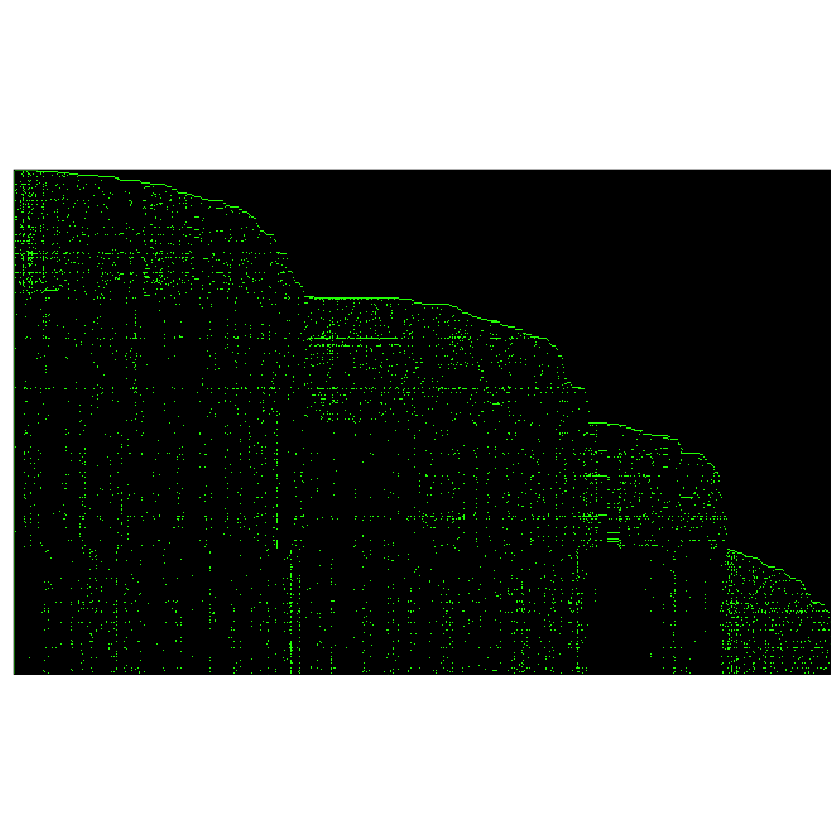

In [171]:
# Cluster on L of SLR
# Acc 45%: Disappointing

source("util.R")

# load the document-term matrix
Ptilde <- as.matrix( read.csv("data/news_1.csv") )
P <- Ptilde/sum(Ptilde) ## replace word frequencies by "probabilities"

# the data is sorted by newsgroup; this is not exploited/known to NMF
# throghout the notebook I truncate values >0.00001 for improved visiblity
# I also decided not to plot the legend
ggplotm(pmin(P,0.000001), format="", show.axis=FALSE, mid="black",show.legend=FALSE)


r <- 4
lr.gkl <- lee01.gkl(P, r, reps=5)
slr.gkl <- nmf.slr(lr.gkl) 

cluster <- kmeans(slr.gkl$L, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

In [173]:
# Cluster on W of WH
# Acc:33%; for class 4 we improve accuracy
r <- 4
lr.gkl <- lee01.gkl(P, r, reps=5)
cluster <- kmeans(lr.gkl$L, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Epoch 0 , loss 252757.7 
Epoch 1 , 0.474138 
Epoch 2 , 0.4485649 
Epoch 3 , 0.4189172 
Epoch 4 , 0.3970591 
Epoch 5 , 0.384563 
Epoch 6 , 0.3776496 
Epoch 7 , 0.3733756 
Epoch 8 , 0.3705 
Epoch 9 , 0.3684448 
Epoch 10 , 0.3667688 
Epoch 11 , 0.3652086 
Epoch 12 , 0.3636045 
Epoch 13 , 0.3618323 
Epoch 14 , 0.3597878 
Epoch 15 , 0.357405 
Epoch 16 , 0.3547132 
Epoch 17 , 0.3520939 
Epoch 18 , 0.3498454 
Epoch 19 , 0.3479414 
Epoch 20 , 0.3461808 
Epoch 21 , 0.3445471 
Epoch 22 , 0.3430853 
Epoch 23 , 0.3417955 
Epoch 24 , 0.3406333 
Epoch 25 , 0.3395673 
Epoch 26 , 0.3386184 
Epoch 27 , 0.3377652 
Epoch 28 , 0.3370001 
Epoch 29 , 0.3362956 
Epoch 30 , 0.3356413 
Epoch 31 , 0.3350567 
Epoch 32 , 0.3345566 
Epoch 33 , 0.3341383 
Epoch 34 , 0.3337862 
Epoch 35 , 0.3334798 
Epoch 36 , 0.3331901 
Epoch 37 , 0.332876 
Epoch 38 , 0.3325179 
Epoch 39 , 0.3321856 
Epoch 40 , 0.3319308 
Epoch 41 , 0.3317278 
Epoch 42 , 0.3315722 
Epoch 43 , 0.3314462 
Epoch 44 , 0.3313359 
Epoch 45 , 0.3312343 
E

Accuracy 
   0.345

Confusion Matrix and Statistics

   
     1  3  2  4
  1 98 95 97 68
  3  2  5  0  0
  2  0  0  3  0
  4  0  0  0 32

Overall Statistics
                                          
               Accuracy : 0.345           
                 95% CI : (0.2985, 0.3939)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : 1.405e-05       
                                          
                  Kappa : 0.1267          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 3 Class: 2 Class: 4
Sensitivity            0.9800   0.0500   0.0300   0.3200
Specificity            0.1333   0.9933   1.0000   1.0000
Pos Pred Value         0.2737   0.7143   1.0000   1.0000
Neg Pred Value         0.9524   0.7583   0.7557   0.8152
Prevalence             0.2500   0.2500   0.2500   0.2500
Detection Rate         0.2450   0.0125   0.0075   0.0800
Detection Prevalence   0.8950   0.0175   0.0075   0.0800
Balanced Accuracy      0.5567   0.5217  

In [174]:
# cluster on U of SVD
P.svd <- svd(P)
u.4 <- P.svd$u[,1:4]
d.4 <- diag(P.svd$d[1:4])
cluster <- kmeans(u.4 %*% d.4, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Accuracy 
       1

Confusion Matrix and Statistics

   
      1   2   3   4
  1 100   0   0   0
  2   0 100   0   0
  3   0   0 100   0
  4   0   0   0 100

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9908, 1)
    No Information Rate : 0.25       
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity              1.00     1.00     1.00     1.00
Specificity              1.00     1.00     1.00     1.00
Pos Pred Value           1.00     1.00     1.00     1.00
Neg Pred Value           1.00     1.00     1.00     1.00
Prevalence               0.25     0.25     0.25     0.25
Detection Rate           0.25     0.25     0.25     0.25
Detection Prevalence     0.25     0.25     0.25     0.25
Balanced Accuracy        1.00     1.00     1.00     1.00

### Experiment 2 - Combine Experiment 0 and 1 - ON PAR  (SLR)


In [175]:
# Cluster on L of SLR
# Acc 44.75%: Disappointing

source("util.R")

# load the document-term matrix
Ptilde <- as.matrix( read.csv("data/news_1.csv") )
P <- Ptilde/sum(Ptilde) ## replace word frequencies by "probabilities"

r <- 4
lr.gkl <- lee01.gkl((P>0), r, reps=5)
slr.gkl <- nmf.slr(lr.gkl) 

cluster <- kmeans(slr.gkl$L, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Epoch 0 , loss 254187.1 
Epoch 1 , 19448.74 
Epoch 2 , 19115.42 
Epoch 3 , 18668.08 
Epoch 4 , 18087.85 
Epoch 5 , 17433.09 
Epoch 6 , 16796.63 
Epoch 7 , 16235.37 
Epoch 8 , 15773.2 
Epoch 9 , 15418.43 
Epoch 10 , 15157.43 
Epoch 11 , 14954.13 
Epoch 12 , 14775.47 
Epoch 13 , 14621.51 
Epoch 14 , 14485.81 
Epoch 15 , 14366.01 
Epoch 16 , 14255.24 
Epoch 17 , 14158.67 
Epoch 18 , 14091.59 
Epoch 19 , 14046.3 
Epoch 20 , 14009.94 
Epoch 21 , 13979.43 
Epoch 22 , 13958.22 
Epoch 23 , 13944.53 
Epoch 24 , 13934.06 
Epoch 25 , 13924.11 
Epoch 26 , 13915.84 
Epoch 27 , 13909.18 
Epoch 28 , 13901.71 
Epoch 29 , 13891.93 
Epoch 30 , 13884.69 
Epoch 31 , 13881 
Epoch 32 , 13878.07 
Epoch 33 , 13873.37 
Epoch 34 , 13860.74 
Epoch 35 , 13847.95 
Epoch 36 , 13843.92 
Epoch 37 , 13841.48 
Epoch 38 , 13839.7 
Epoch 39 , 13838.29 
Epoch 40 , 13836.74 
Epoch 41 , 13834.86 
Epoch 42 , 13833.24 
Epoch 43 , 13832.08 
Epoch 0 , loss 251516.3 
Epoch 1 , 19440.28 
Epoch 2 , 19137.54 
Epoch 3 , 18723.16 
Ep

Accuracy 
    0.95

Confusion Matrix and Statistics

   
     1  4  2  3
  1 93  1  1  1
  4  4 97  1  2
  2  2  1 95  2
  3  1  1  3 95

Overall Statistics
                                          
               Accuracy : 0.95            
                 95% CI : (0.9238, 0.9692)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9333          
 Mcnemar's Test P-Value : 0.8494          

Statistics by Class:

                     Class: 1 Class: 4 Class: 2 Class: 3
Sensitivity            0.9300   0.9700   0.9500   0.9500
Specificity            0.9900   0.9767   0.9833   0.9833
Pos Pred Value         0.9688   0.9327   0.9500   0.9500
Neg Pred Value         0.9770   0.9899   0.9833   0.9833
Prevalence             0.2500   0.2500   0.2500   0.2500
Detection Rate         0.2325   0.2425   0.2375   0.2375
Detection Prevalence   0.2400   0.2600   0.2500   0.2500
Balanced Accuracy      0.9600   0.9733  

In [177]:
# Cluster on W of WH
# Acc: 47%; for class 3/4 we improve accuracy
r <- 4
lr.gkl <- lee01.gkl((P>0), r, reps=5)
cluster <- kmeans(lr.gkl$L, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Epoch 0 , loss 258668.4 
Epoch 1 , 19449.95 
Epoch 2 , 19163.84 
Epoch 3 , 18804.35 
Epoch 4 , 18357.01 
Epoch 5 , 17869.47 
Epoch 6 , 17410.66 
Epoch 7 , 17004.38 
Epoch 8 , 16660.47 
Epoch 9 , 16393.87 
Epoch 10 , 16204.62 
Epoch 11 , 16067.4 
Epoch 12 , 15960.37 
Epoch 13 , 15865.82 
Epoch 14 , 15770.91 
Epoch 15 , 15669.38 
Epoch 16 , 15559.59 
Epoch 17 , 15437.08 
Epoch 18 , 15305.47 
Epoch 19 , 15179.58 
Epoch 20 , 15067.38 
Epoch 21 , 14966.52 
Epoch 22 , 14869.52 
Epoch 23 , 14776.21 
Epoch 24 , 14701.69 
Epoch 25 , 14648.26 
Epoch 26 , 14605.35 
Epoch 27 , 14556.08 
Epoch 28 , 14500.49 
Epoch 29 , 14442.65 
Epoch 30 , 14393.47 
Epoch 31 , 14361.29 
Epoch 32 , 14337.67 
Epoch 33 , 14316.93 
Epoch 34 , 14291.71 
Epoch 35 , 14264.74 
Epoch 36 , 14239.5 
Epoch 37 , 14220.9 
Epoch 38 , 14207.98 
Epoch 39 , 14200.17 
Epoch 40 , 14193.69 
Epoch 41 , 14184.08 
Epoch 42 , 14171.56 
Epoch 43 , 14160.84 
Epoch 44 , 14150.11 
Epoch 45 , 14139.3 
Epoch 46 , 14128.66 
Epoch 47 , 14118.83 
E

Accuracy 
    0.47

Confusion Matrix and Statistics

   
      1   2   3   4
  1 100  96  57  58
  2   0   3   0   0
  3   0   1  43   0
  4   0   0   0  42

Overall Statistics
                                          
               Accuracy : 0.47            
                 95% CI : (0.4202, 0.5202)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2933          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            1.0000   0.0300   0.4300    0.420
Specificity            0.2967   1.0000   0.9967    1.000
Pos Pred Value         0.3215   1.0000   0.9773    1.000
Neg Pred Value         1.0000   0.7557   0.8399    0.838
Prevalence             0.2500   0.2500   0.2500    0.250
Detection Rate         0.2500   0.0075   0.1075    0.105
Detection Prevalence   0.7775   0.0075   0.1100    0.105
Balanced Accuracy   

In [180]:
# cluster on U of SVD
P.svd <- svd((P>0))
u.4 <- P.svd$u[,1:4]
d.4 <- diag(P.svd$d[1:4])
cluster <- kmeans(u.4 %*% d.4, 4, nstart=100)$cluster
cm(cluster)$overall["Accuracy"]
cm(cluster)

Accuracy 
  0.4075

Confusion Matrix and Statistics

   
      1   2   3   4
  1 100  97  91  49
  2   0   3   0   0
  3   0   0   9   0
  4   0   0   0  51

Overall Statistics
                                          
               Accuracy : 0.4075          
                 95% CI : (0.3589, 0.4574)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : 3.679e-12       
                                          
                  Kappa : 0.21            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            1.0000   0.0300   0.0900   0.5100
Specificity            0.2100   1.0000   1.0000   1.0000
Pos Pred Value         0.2967   1.0000   1.0000   1.0000
Neg Pred Value         1.0000   0.7557   0.7673   0.8596
Prevalence             0.2500   0.2500   0.2500   0.2500
Detection Rate         0.2500   0.0075   0.0225   0.1275
Detection Prevalence   0.8425   0.0075   0.0225   0.1275
Balanced Accuracy   